In [16]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

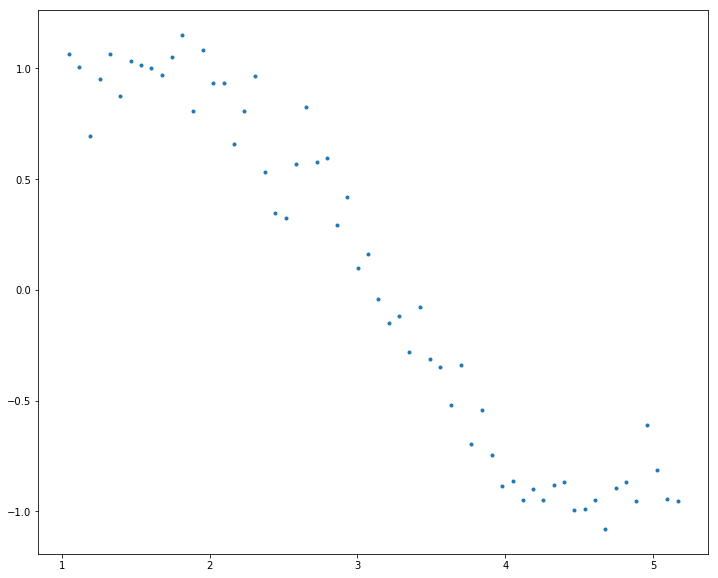

In [17]:
x = np.array ([i*np.pi/180 for i in range (60, 300, 4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [18]:
for i in range (2,16):
    colname = 'x_%d'%i
    data[colname] = data['x']**i
data[:20]

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170
5,1.396263,0.876795,1.949551,2.722087,3.800751,5.306850,7.409760,10.345976,14.445708,20.170014,28.162652,39.322480,54.904540,76.661199,107.039227,149.454955
6,1.466077,1.034349,2.149381,3.151156,4.619837,6.773034,9.929787,14.557828,21.342890,31.290311,45.873992,67.254785,98.600665,144.556125,211.930348,310.706118
7,1.535890,1.015673,2.358957,3.623098,5.564680,8.546734,13.126841,20.161381,30.965658,47.559837,73.046666,112.191625,172.313965,264.655252,406.481286,624.310438
8,1.605703,1.000035,2.578282,4.139955,6.647537,10.673970,17.139225,27.520503,44.189752,70.955613,113.933634,182.943568,293.753019,471.680079,757.378076,1216.124181
9,1.675516,0.968332,2.807354,4.703767,7.881237,13.205140,22.125424,37.071504,62.113901,104.072840,174.375717,292.169318,489.534391,820.222745,1374.296400,2302.655719


In [19]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    predictors = ['x']
    if power >= 2:
        predictors.extend(['x_%d'%i for i in range (2,power+1)])
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'], '.')
        plt.title('Plot of the power: %d'%power)
        
    rss = sum ((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

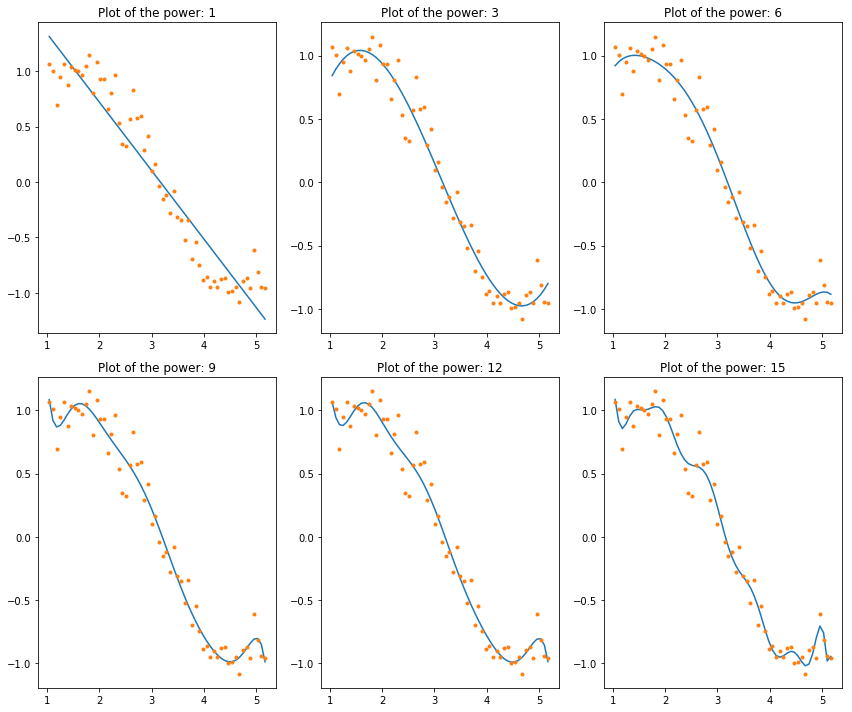

In [20]:
col = ['rss', 'intercept'] + ['coef_x_%d'%i for i in range (1,16)]
ind = ['model_pow_%d'%i for i in range (1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

for i in range (1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power = i, models_to_plot = models_to_plot)